In [33]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageDraw
import matplotlib.patches as patches

In [34]:
# Function to create a hexagon image with a circular image overlay on top
def create_hexagon_with_image_overlay(side_length_mm, hex_color='#FFFFFF', border_color='#000000', border_thickness=2,
                                      image_path=None, image_size=0.5, image_position=(0, 0)):
    # Calculate the vertices of the hexagon
    angles = np.linspace(0, 2 * np.pi, 7)
    x = side_length_mm * np.cos(angles)
    y = side_length_mm * np.sin(angles)
    
    # Create the plot for hexagon
    fig, ax = plt.subplots()
    ax.fill(x, y, color=hex_color, edgecolor=border_color, linewidth=border_thickness)
    ax.set_aspect('equal')

    # Set limits to match the hexagon size
    ax.set_xlim(-side_length_mm - 1, side_length_mm + 1)
    ax.set_ylim(-side_length_mm - 1, side_length_mm + 1)

    # If image is provided, add it as a circular overlay
    if image_path:
        # Load the image
        img = Image.open(image_path).convert('RGBA')
        
        # Resize the image based on the given image_size ratio
        img_size = int(image_size * side_length_mm * 2 * 100)  # Multiply by 100 for better scaling
        img = img.resize((img_size, img_size))

        # Create a circular mask for the image
        circle = Image.new('L', (img_size, img_size), 0)
        draw = ImageDraw.Draw(circle)
        draw.ellipse((0, 0, img_size, img_size), fill=255)

        # Apply the circular mask to the image
        img.putalpha(circle)

        # Convert the image to numpy array to use with Matplotlib
        img_np = np.array(img)

        # Overlay the image in the center of the hexagon
        ax.imshow(img_np, extent=[-image_size * side_length_mm + image_position[0], 
                                  image_size * side_length_mm + image_position[0], 
                                  -image_size * side_length_mm + image_position[1], 
                                  image_size * side_length_mm + image_position[1]], zorder=2)  # zorder places image on top

    # Remove axes for clean image
    ax.axis('off')
    
    # Save image to a file
    plt.savefig('hexagon_with_image_overlay.png', bbox_inches='tight', transparent=True, dpi=300)
    plt.show()


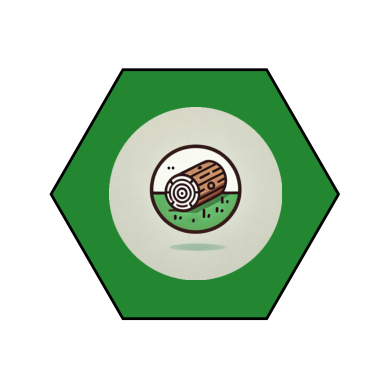

In [35]:
# Hexagon side length in mm
side_length_mm = 3.5

# Call the function to create the hexagon with image overlay
create_hexagon_with_image_overlay(
    side_length_mm, 
    hex_color='#238732', 
    border_color='#000000', 
    border_thickness=2, 
    image_path='wood.webp',  # Path to your .webp image
    image_size=0.6,  # Size of the circular image relative to hexagon (0.6 means 60% of the hexagon's size)
    image_position=(0, 0)  # Adjust the position (x, y) of the image inside the hexagon
)
